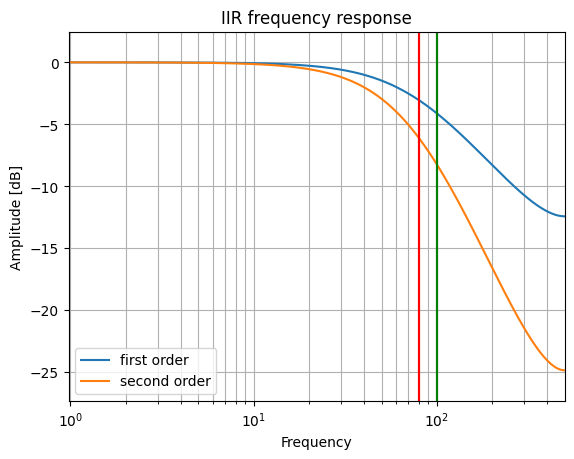

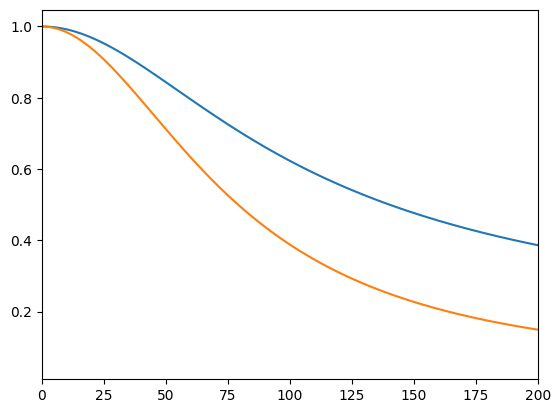

tau = 0.0015915494309189533
[0.14889530583185118]
[1, -1.2282609098099249, 0.3771562156417761]


In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 1000
fc = 100

fp = 80 # pass band freq

# Sampling time
T = 1/fs

wg = 2*np.pi*fc*T
# Tau
tau = 1/(2*np.pi*fc) #approximation

b0 = T/(T + tau)
a0 = 1
a1 = -tau/(T+tau)

b = [b0    ]
a = [a0, a1]

# Second order
b1 = [b0*b0                ]
a1 = [a0**2, 2*a0*a1, a1**2]

w,h =  signal.freqz(b,a)
w,h1 =  signal.freqz(b1,a1)

f = (w * fs)/ (2 * np.pi) 


plt.semilogx(f, 20 * np.log10(abs(h)), label='first order')
plt.axvline(fc, color='green') # cutoff frequency
plt.axvline(fp, color='red') # drone movement frequency

plt.semilogx(f, 20 * np.log10(abs(h1)), label='second order')
plt.title('IIR frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') # cutoff frequency
plt.axvline(fp, color='red') # drone movement frequency

plt.legend()
plt.show()

plt.plot(f, abs(h))
plt.xlim([0, fc+100])
plt.grid(which='both', axis='both')

plt.plot(f, abs(h1))
plt.xlim([0, fc+100])
plt.grid(which='both', axis='both')

plt.show()

print(f"tau = {tau}")

print(b1)
print(a1)

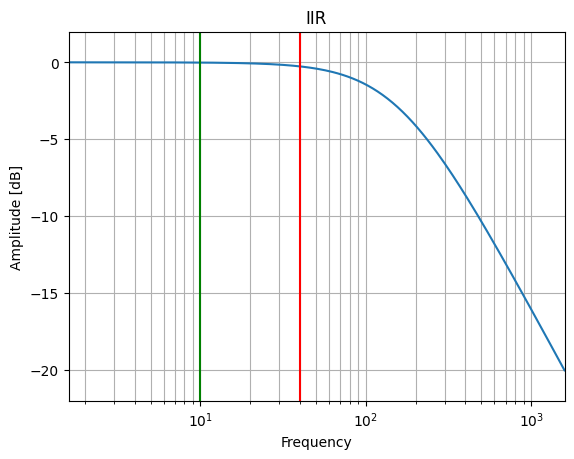

[1]
[1, -0.9999]


In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 1000;
fc = 10;

fp = 40; # pass band freq

# Sampling time
T = 1/fs;

wg = 2*np.pi*fc*T

c = np.cos(wg)
s = np.sin(wg)

# Tau
#tau = (np.sqrt(-c**2*(s**2-2)) + c)/c**2
#tau = (c - np.sqrt(-c**2*(s**2-2)))/c**2
tau = -0.9999

b0 = 1
a0 = 1
a1 = tau

b = [b0]
a = [a0, a1]

#w,h =  signal.freqz(b,a)
w,h =  signal.freqs(b, a)

f = (w * fs)/ (2 * np.pi)

plt.semilogx(f, 20 * np.log10(abs(h)))
plt.title('IIR')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') # cutoff frequency
plt.axvline(fp, color='red') # cutoff frequency
plt.show()
print(b)
print(a)

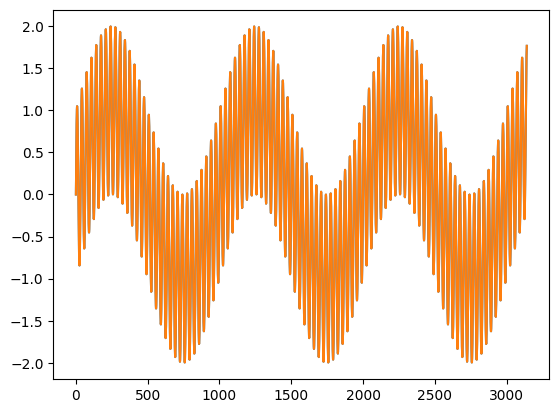

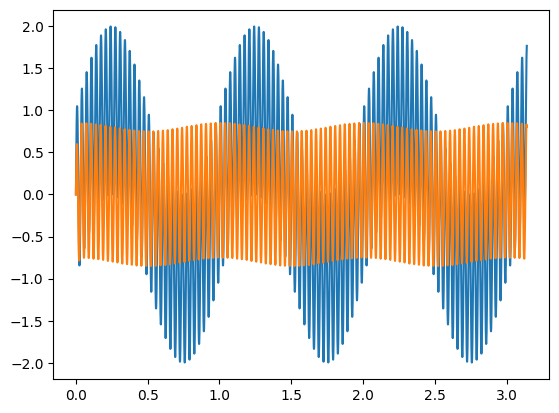

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def high_pass_filter(x, y, T, fg):
    tau = 1 / (2 * np.pi * fg)
    a1 = (2*tau/T)/(1 + 2*tau/T)
    a2 = (2*tau/T - 1)/(2*tau/T + 1)
    y[0] = a1 * (x[0] - x[1]) + a2 * y[1]

    x[1] = x[0]
    y[1] = y[0]


def low_pass_filter(x, y, T, fg):
    tau = 1 / (2 * np.pi * fg)
    a1 = T/(T+2*tau)
    a2 = (T - 2*tau)/(T + 2*tau)

    y[0] = a1 * (x[0] + x[1]) - a2 * y[1]

    x[1] = x[0]
    y[1] = y[0]

fs = 1000
dt = 1 / fs

fg = 20
fg1 = 100
f1 = 1
f2 = 30
t = np.arange(0, np.pi, dt)

s = np.sin(2*np.pi * f1 * t) + np.sin(2*np.pi * f2 * t)


x = [0, 0]
y = [0, 0]
x1 = [0, 0]
y1 = [0, 0]

x_out = []
y_out = []

x_out1 = []
y_out1 = []

y_out2 = []

for idx in range(len(t)):
    x[0] = s[idx]
    
    high_pass_filter(x, y, dt, fg)
    low_pass_filter(y, y1, dt, fg1)

    y_out.append(y[0])
    x_out.append(x[0])
    y_out1.append(y1[0])
    x_out1.append(x1[0])
    y_out2.append(y1[0])


plt.figure(1)

plt.plot(x_out)
plt.plot(s)

plt.figure(2)
plt.plot(t, x_out)
plt.plot(t, y_out1)
plt.show()



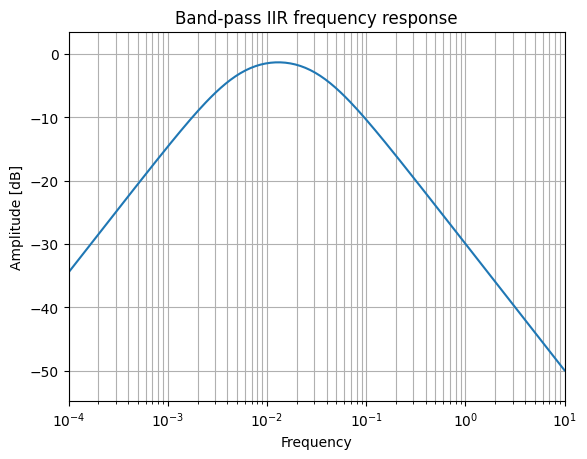

In [5]:

fg0 = 30  #low pass
fg1 = 5 #high pass

#Low pass
tau0 = 1/(2*np.pi*fg0)
#High pass
tau1 = 1/(2*np.pi*fg1)

b0 = 0
b1 = tau1
b2 = 0

a0 = 1
a1 = tau0 + tau1
a2 = tau0 * tau1

#Analog 
b = [b0, b1, b2]
a = [a0, a1, a2]

w, h = signal.freqs(b, a)

plt.semilogx(w, 20*np.log10(abs(h)))
plt.title('Band-pass IIR frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
#lt.axvline(fg0, color='green') 
#plt.axvline(fg1, color='red') 


In [6]:
fs = 1000

#Bilinear uses LTI
b = [b[2], b[1], b[0]]
a = [a[2], a[1], a[0]]

bc, ac = signal.bilinear(b, a, fs=fs)

bc = [bc[2], bc[1], bc[0]]
ac = [ac[2], ac[1], ac[0]]

print(bc, ac)

[-0.08479819264823989, 0.0, 0.08479819264823989] [0.8021375504874404, -1.7968095229062124, 1.0]


C:\Users\Dom\AppData\Local\Temp\ipykernel_916\852568470.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(f, 20*np.log10(np.abs(h)))


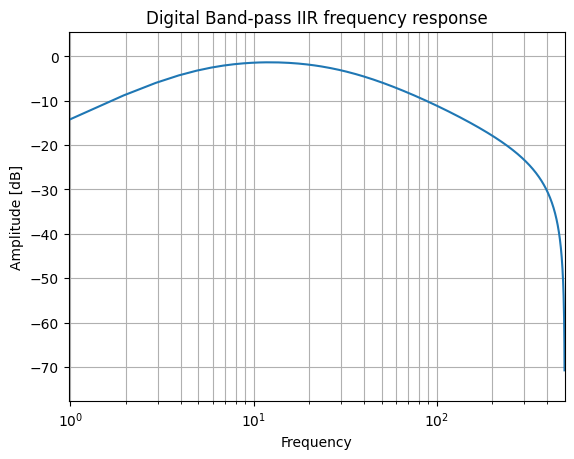

(5.0, 30.0)

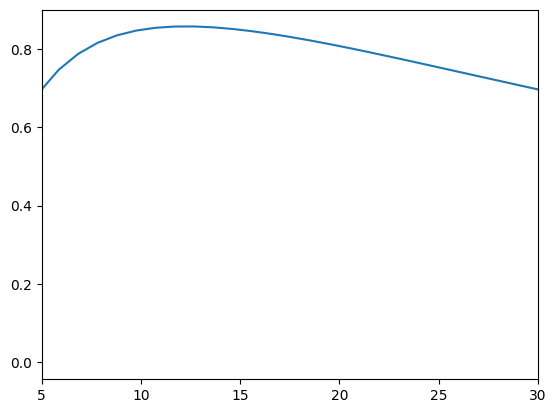

In [7]:
w, h = signal.freqz(bc, ac)
f = (w*fs)/(2*np.pi)
plt.semilogx(f, 20*np.log10(np.abs(h)))
plt.title('Digital Band-pass IIR frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

plt.plot(f, np.abs(h))
plt.xlim([fg1, fg0])

[ 0.21480504  0.         -0.21480504] [ 1.         -1.55612066  0.57038993]


C:\Users\Dom\AppData\Local\Temp\ipykernel_916\3596829827.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(f, 20*np.log10(np.abs(h)))


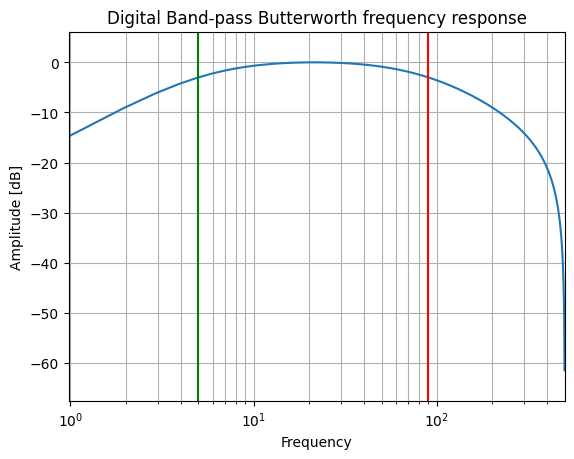

(5.0, 90.0)

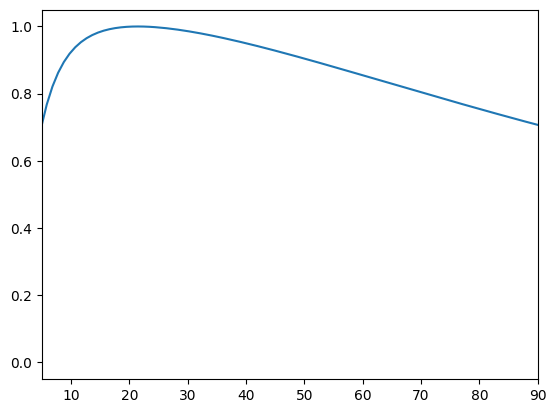

In [8]:
fgl = 5; fgh = 90; fs=1000

wn = [fgl, fgh] 
b, a = signal.butter(1, wn, btype='band', fs=fs)

print(b,a)

w, h = signal.freqz(b, a)
f = (w*fs)/(2*np.pi)
plt.semilogx(f, 20*np.log10(np.abs(h)))
plt.title('Digital Band-pass Butterworth frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fgl, color='green') # cutoff frequency
plt.axvline(fgh, color='red') # cutoff frequency
plt.show()

plt.plot(f, np.abs(h))
plt.xlim([fgl, fgh])

[ 0.136774  0.       -0.136774] [ 1.       -1.710764  0.726451]


C:\Users\Dom\AppData\Local\Temp\ipykernel_916\3651644581.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(f, 20*np.log10(np.abs(h)))


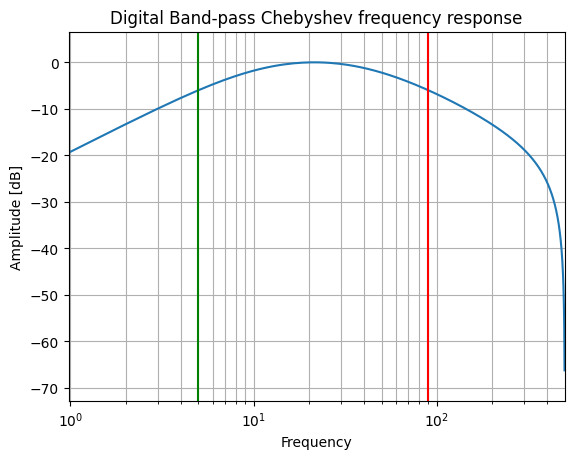

(5.0, 90.0)

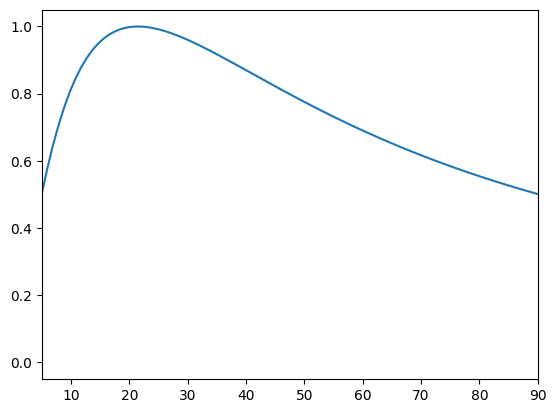

In [16]:
fgl = 5; fgh = 90; fs=1000

wn = [fgl, fgh] 
b, a = signal.cheby1(1, 6, wn, btype='bandpass', fs=fs)

b = np.around(b, 6)
a = np.around(a, 6)

print(b,a)

w, h = signal.freqz(b, a)
f = (w*fs)/(2*np.pi)
plt.semilogx(f, 20*np.log10(np.abs(h)))

plt.title('Digital Band-pass Chebyshev frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fgl, color='green') # cutoff frequency
plt.axvline(fgh, color='red') # cutoff frequency
plt.show()

plt.plot(f, np.abs(h))
plt.xlim([fgl, fgh])